In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('top50.csv', encoding = 'latin-1')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head(3)

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85


###### 1.      Display details of the songs that have popularity above 80

In [3]:
df[df.Popularity > 80].head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84


###### 2.     Which is having maximum length, beats per minute?

In [4]:
print(df['Beats.Per.Minute'].max())
print(df['Length.'].max())

190
309


###### 3.      Which is having minimum length, beats per minute?

In [5]:
print(df['Beats.Per.Minute'].min())
print(df['Length.'].min())

85
115


###### 4.      Create new column to store string length

In [6]:
df['Track.Name.Len'] = df['Track.Name'].apply(lambda s: len(s))
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Track.Name.Len
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,8
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,5
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,29
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,31
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,27


###### 5.      Create new column to store first name of each artist

In [7]:
df['Artist.Name.Len'] = df['Artist.Name'].apply(lambda s: len(s))
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Track.Name.Len,Artist.Name.Len
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,8,12
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,5,8
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,29,13
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,31,10
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,27,11


###### 6.      How many songs from “dance pop” genre?

In [8]:
df[df.Genre == 'dance pop'].shape[0]

8

###### 7.      What is average length for each genre?

In [9]:
df.groupby('Genre')['Length.'].mean().reset_index().rename(columns = {'Length.':'Average Length'}).head()

,Genre,Average Length
0,atl hip hop,200.0
1,australian pop,210.0
2,big room,164.0
3,boy band,181.0
4,brostep,198.0


###### 8.      What is average length for each artist?

In [10]:
df.groupby('Artist.Name')['Length.'].mean().reset_index().rename(columns = {'Length.':'Average Length'}).head()

,Artist.Name,Average Length
0,Ali Gatie,213.0
1,Anuel AA,302.0
2,Ariana Grande,182.5
3,Bad Bunny,251.0
4,Billie Eilish,194.5


###### 9.      What is maximum length for each genre?

In [11]:
df.groupby('Genre')['Length.'].max().reset_index().rename(columns = {'Length.':'Maximum Length'}).head()

,Genre,Maximum Length
0,atl hip hop,200
1,australian pop,210
2,big room,164
3,boy band,181
4,brostep,214


###### 10.   What is maximum length for each artist?

In [12]:
df.groupby('Artist.Name')['Length.'].max().reset_index().rename(columns = {'Length.':'Maximum Length'}).head()

,Artist.Name,Maximum Length
0,Ali Gatie,213
1,Anuel AA,302
2,Ariana Grande,186
3,Bad Bunny,251
4,Billie Eilish,195


###### 11.   How many songs share same popularity?

In [13]:
df.groupby('Popularity')['Track.Name'].count().reset_index().sort_values('Track.Name', ascending = False).head()

,Popularity,Track.Name
10,88,8
11,89,8
13,91,7
9,87,4
12,90,3


###### 12.   Rank each song based on popularity.

In [14]:
df.groupby('Popularity')['Track.Name'].transform(lambda x: x.rank()).head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Track.Name, dtype: float64

###### 13.   Rank each song based on danceability.

In [15]:
df.groupby('Danceability')['Track.Name'].transform(lambda x: x.rank()).head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Track.Name, dtype: float64

###### 14.   Average, Maximum, Minimum, standard deviation of each column

In [16]:
df.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Track.Name.Len,Artist.Name.Len
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000,19.160000,9.400000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489,14.637609,3.175159
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000,4.000000,3.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000,8.000000,8.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000,15.000000,10.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000,26.500000,11.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000,68.000000,16.000000


###### 15.   Average, Maximum, Minimum, standard deviation of each row

In [17]:
df.apply(lambda x: x.describe()).head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Track.Name.Len,Artist.Name.Len
25%,NaN,NaN,NaN,96.0,55.25,67.00,-6.75,8.00,38.25,176.75,8.25,5.0,86.00,8.0,8.00
50%,NaN,NaN,NaN,104.5,66.50,73.50,-6.00,11.00,55.50,198.00,15.00,7.0,88.00,15.0,10.00
75%,NaN,NaN,NaN,137.5,74.75,79.75,-4.00,15.75,69.50,217.50,33.75,15.0,90.75,26.5,11.75
count,50,50,50,50.0,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.0,50.00,50.0,50.00
freq,1,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### 17.   Take log transform on Loudness DB and add as column

In [18]:
df.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity', 'Track.Name.Len',
       'Artist.Name.Len'],
      dtype='object')

In [19]:
df['Loudness_log'] = np.log(np.abs(df['Loudness..dB..']))
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Track.Name.Len,Artist.Name.Len,Loudness_log
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,8,12,1.791759
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,5,8,1.386294
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,29,13,1.386294
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,31,10,2.079442
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,27,11,1.386294


###### 18.   Visualize if there is linear correlation between beats per minutes and popularity, danceability and popularity, energy and popularity

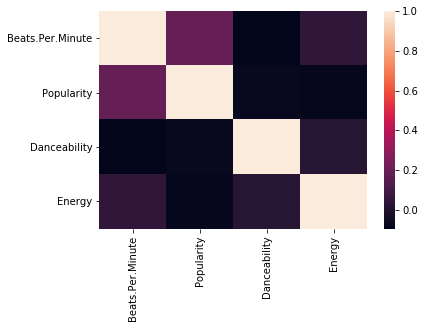

In [20]:
cols = ['Beats.Per.Minute','Popularity','Danceability','Energy']
sns.heatmap(df[cols].corr())

###### 19.   What is distribution of popularity with respect to energy

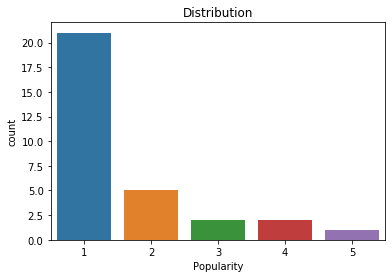

In [21]:
sns.countplot(df.groupby('Energy')['Popularity'].count()).set_title('Distribution')
plt.show()

###### 20.   What is distribution of popularity with respect to beats Per minute

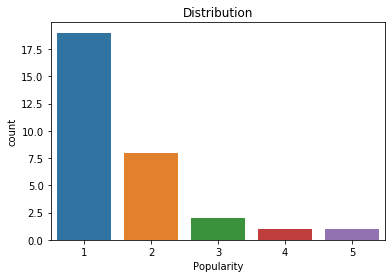

In [22]:
sns.countplot(df.groupby('Beats.Per.Minute')['Popularity'].count()).set_title('Distribution')
plt.show()

###### 21.   Are there any outliers in popularity, danceability, beats per minute?

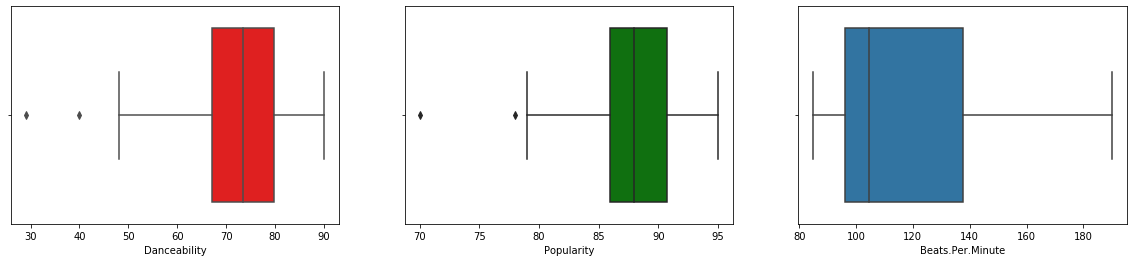

In [23]:
fig, ax = plt.subplots(1,3, figsize = (20,4) )
sns.boxplot(df.Danceability, ax = ax[0], color = 'r')
sns.boxplot(df.Popularity, ax = ax[1], color = 'g')
sns.boxplot(df['Beats.Per.Minute'], ax = ax[2])
plt.show()

## Note: dimonds represents outliers.

###### 22.   Visual each artist distribution

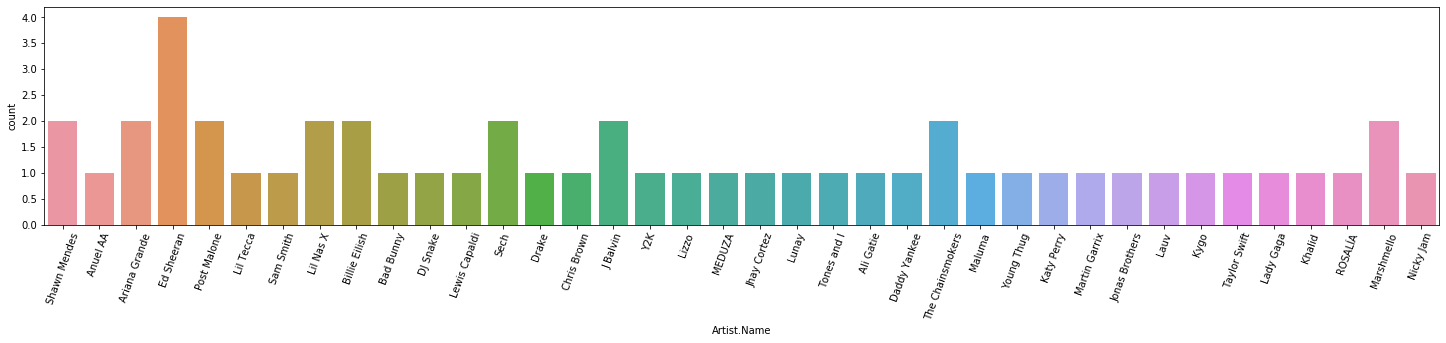

In [24]:
plt.figure(figsize = (25,4))
sns.countplot(df['Artist.Name'])
plt.xticks(rotation=70)
plt.show()

###### 23.   Visual each track name distribution

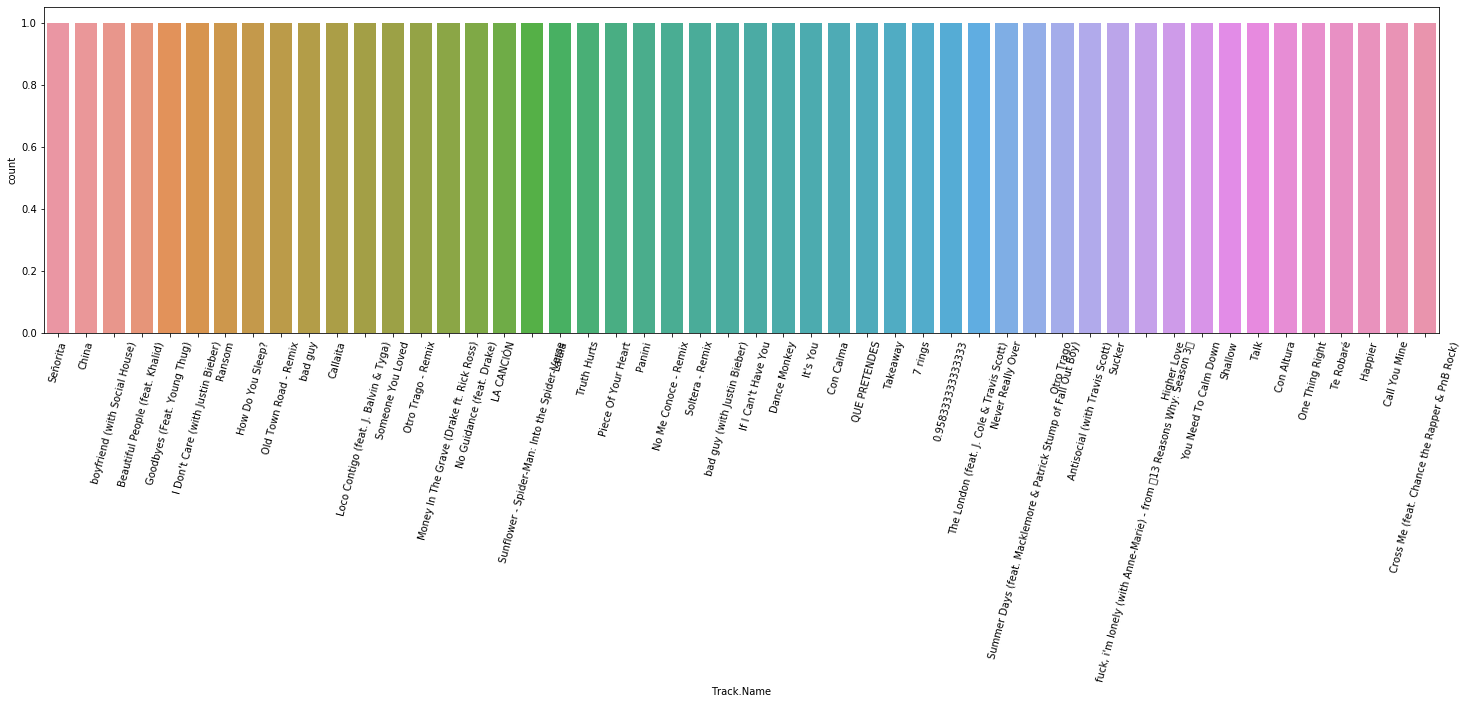

In [25]:
plt.figure(figsize = (25,6))
sns.countplot(df['Track.Name'])
plt.xticks(rotation=75)
plt.show()

###### 24.   Visual each genre distribution

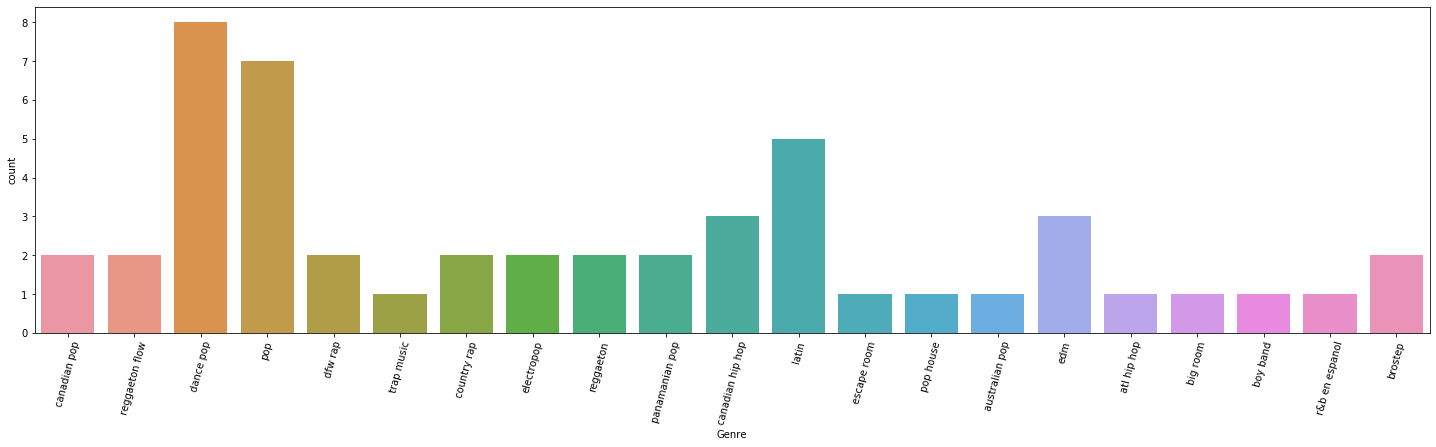

In [26]:
plt.figure(figsize = (25,6))
sns.countplot(df['Genre'])
plt.xticks(rotation=75)
plt.show()

###### 25.   Visual artist, track, genre distribution using subplots

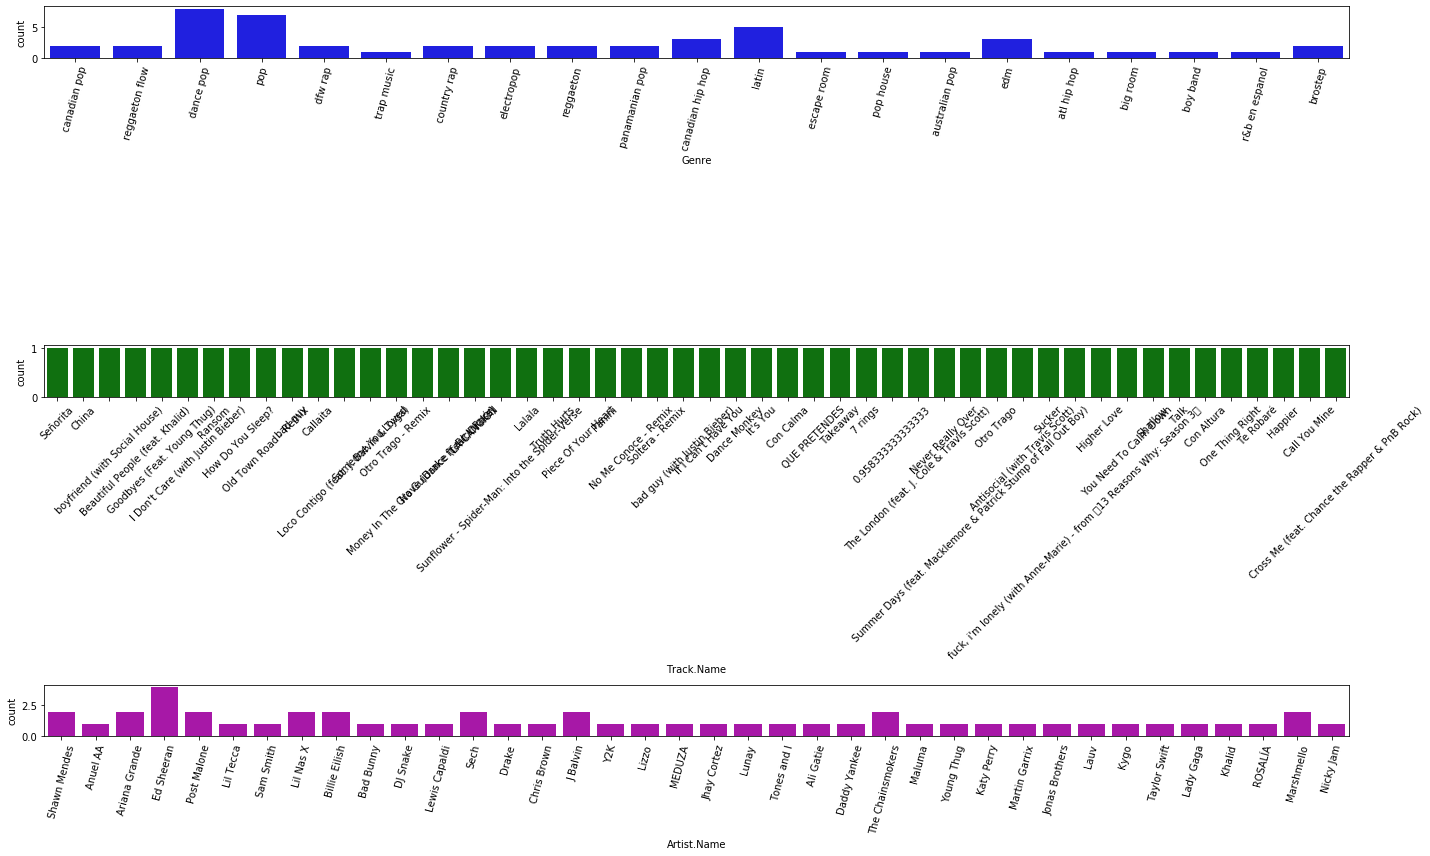

In [27]:
fig, ax = plt.subplots(3,1, figsize = (20,12) )
chart1 = sns.countplot(df['Genre'], ax = ax[0], color = 'b')
ax[0].set_xticklabels(chart1.get_xticklabels(), rotation=75)
chart2 = sns.countplot(df['Track.Name'], ax = ax[1], color = 'g')
ax[1].set_xticklabels(chart2.get_xticklabels(), rotation=45)
chart3 = sns.countplot(df['Artist.Name'], ax = ax[2], color = 'm')
ax[2].set_xticklabels(chart3.get_xticklabels(), rotation=75)
fig.tight_layout()
plt.show()